<a href="https://colab.research.google.com/github/nathaliadutra15/disc_mineracao_dados/blob/main/P1_NATHALIA_DUTRA_OLIVEIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

# IMPORTAÇÃO DAS BIBLIOTECAS

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# CARREGAMENTO DO ARQUIVO CSV

In [11]:
df = pd.read_csv("/content/winemag-data_first150k.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# MOSTRA TODOS OS NOMES DAS COLUNAS

In [3]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

MOSTRA INFORMACOES DA TABELA, COMO DADOS NULL

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


# Gera análise descritivas das colunas numéricas, como média, desvio padrão, mínimo e máximo.

In [5]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


# Conta a quantidade de vezes que cada país aparece no DataFrame.

In [6]:
df["country"].value_counts()

,count
country,
US,62397
Italy,23478
France,21098
Spain,8268
Chile,5816
Argentina,5631
Portugal,5322
Australia,4957
New Zealand,3320


# Conta a frequência de cada variedade de vinho no conjunto de dados.

In [7]:
df["variety"].value_counts()

,count
variety,
Chardonnay,14482
Pinot Noir,14291
Cabernet Sauvignon,12800
Red Blend,10062
Bordeaux-style Red Blend,7347
...,...
Carignan-Syrah,1
Premsal,1
Muskat,1


# Faz uma cópia da tabela original

In [12]:
df1 = df.copy()

# Remove colunas que não são relevantes para a análise

In [16]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2"], axis=1)
df1.head()

,country,description,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Provence red blend,Domaine de la Bégude


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   points       150930 non-null  int64  
 3   price        137235 non-null  float64
 4   province     150925 non-null  object 
 5   variety      150930 non-null  object 
 6   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.1+ MB


In [18]:
df1.shape

(150930, 7)

In [19]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

91%


# Remove as linhas que não possuem valores nas colunas 'country', 'price' e 'variety', garantindo que os dados restantes estejam completos.

In [20]:
df1 = df1.dropna(subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137230 entries, 0 to 150929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      137230 non-null  object 
 1   description  137230 non-null  object 
 2   points       137230 non-null  int64  
 3   price        137230 non-null  float64
 4   province     137230 non-null  object 
 5   variety      137230 non-null  object 
 6   winery       137230 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.4+ MB


In [24]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

100%


___


Criação de um histograma que mostra a distribuição dos pontos de vinhos da coluna 'points'. É utilizado intervalos de pontos entre 80 e o valor máximo presente no conjunto de dados, com cada intervalo representando um ponto específico.

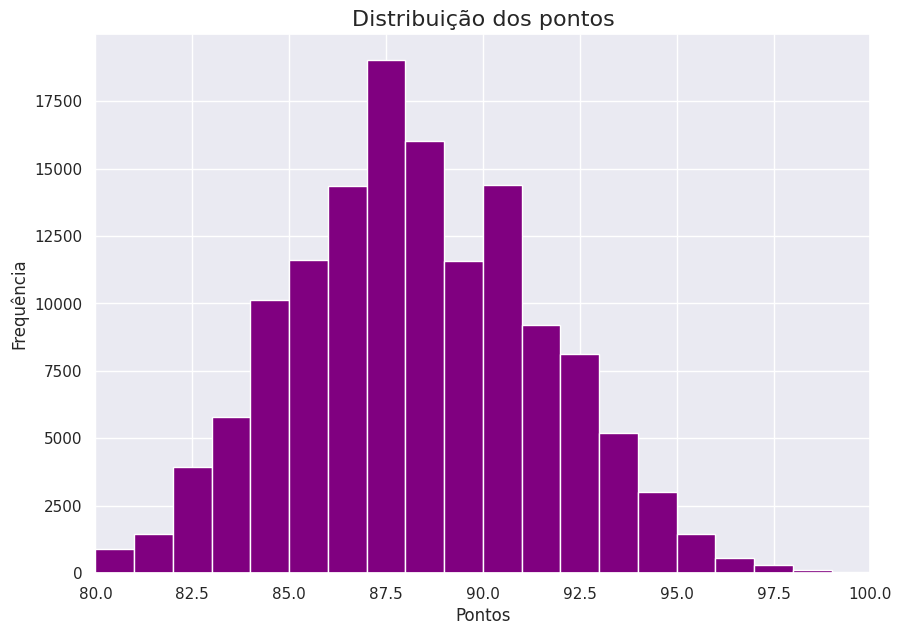

In [21]:
plt.figure(figsize=(10, 7))
plt.hist(df1['points'],
         bins=np.arange(80, df1['points'].max()+1, 1),
         color='purple')
plt.xlim(80, 100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.show()

# Top 10 dos paises que mais produzem vinhos: tabela X gráfico

In [25]:
country_top_10 = df1['country'].value_counts()[:10]
country_top_10

,count
country,
US,62139
Italy,18784
France,14785
Spain,8160
Chile,5766
Argentina,5587
Australia,4894
Portugal,4176
New Zealand,3070


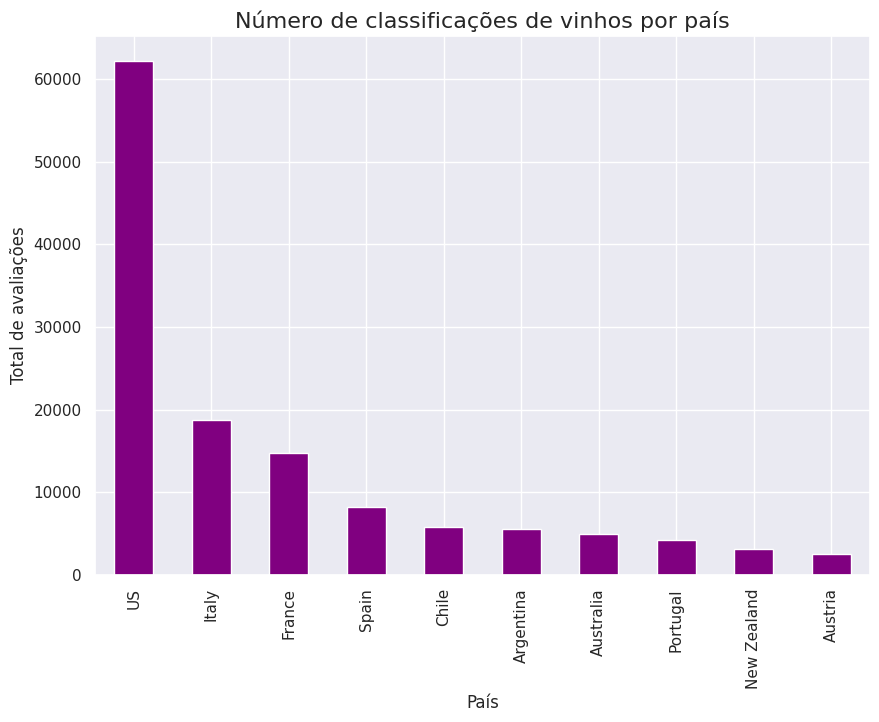

In [23]:
plt.figure(figsize=(10, 7))
country_top_10.plot(kind='bar', color='purple')
plt.title('Número de classificações de vinhos por país', fontsize=16)
plt.xlabel('País')
plt.ylabel('Total de avaliações')
plt.show()

Cálculo da média dos pontos dos vinhos para cada país; Seleciona os 10 países com as maiores médias, ordena esses países de forma decrescente, converte em uma série e aplica um gradiente de cor roxa ao DataFrame resultante para destacar visualmente os países com melhores pontuações médias. (tabela x gráfico)


In [26]:
melhor_qualidade = df1.groupby("country")["points"].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
melhor_qualidade.to_frame().style.background_gradient(cmap='Purples', high=0.5)

,points
country,
England,92.750000
Austria,89.190898
Germany,88.610567
France,88.603314
Italy,88.445006
Canada,88.221649
Portugal,88.176724
Slovenia,88.172840
Morocco,88.166667


<ipython-input-27-f9443548945a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="Purples_r")


Text(0, 0.5, 'País')

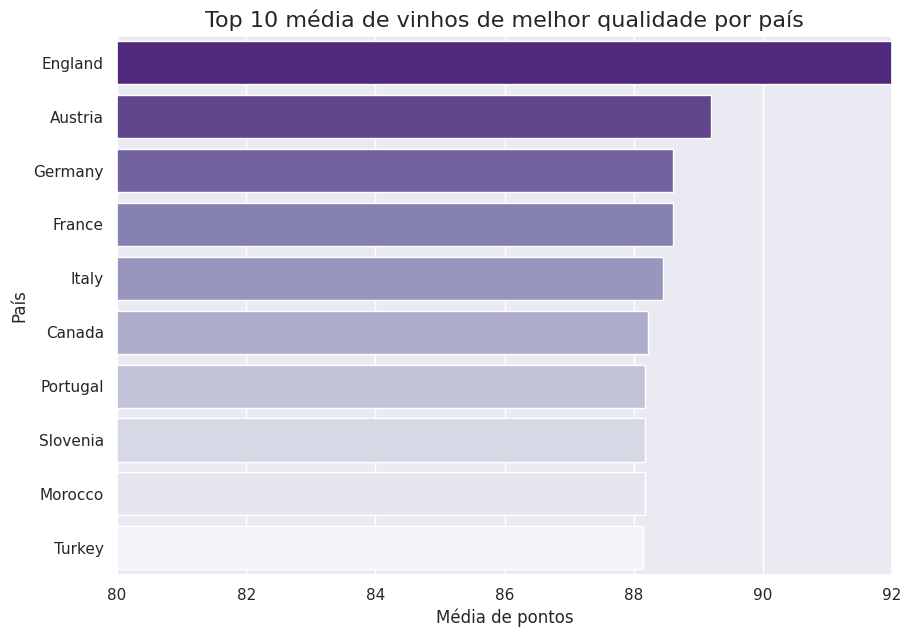

In [27]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade.values

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette="Purples_r")
plt.title('Top 10 média de vinhos de melhor qualidade por país', fontsize=16)
plt.xlabel("Média de pontos")
plt.ylabel("País")

Filtra os vinhos com pontuações maiores ou iguais a 95 e, em seguida, mostra quantos desses vinhos de alta pontuação pertencem a cada país. A saída é uma lista dos países e a contagem de vinhos altamente pontuados para cada um deles.

In [28]:
high_scores = df1[df1['points']>=95]
high_scores["country"].value_counts()

,count
country,
US,1324
France,484
Italy,362
Spain,87
Australia,82
Austria,51
Portugal,51
Germany,47
Argentina,20


Gera um boxplot mostrando a distribuição dos pontos dos vinhos para cada país presente no DataFrame df1. Cada caixa no gráfico representa a variação das pontuações dos vinhos de um país específico, permitindo comparar visualmente a qualidade dos vinhos entre diferentes países, identificando medianas e dispersão dos dados

Text(0, 0.5, 'País')

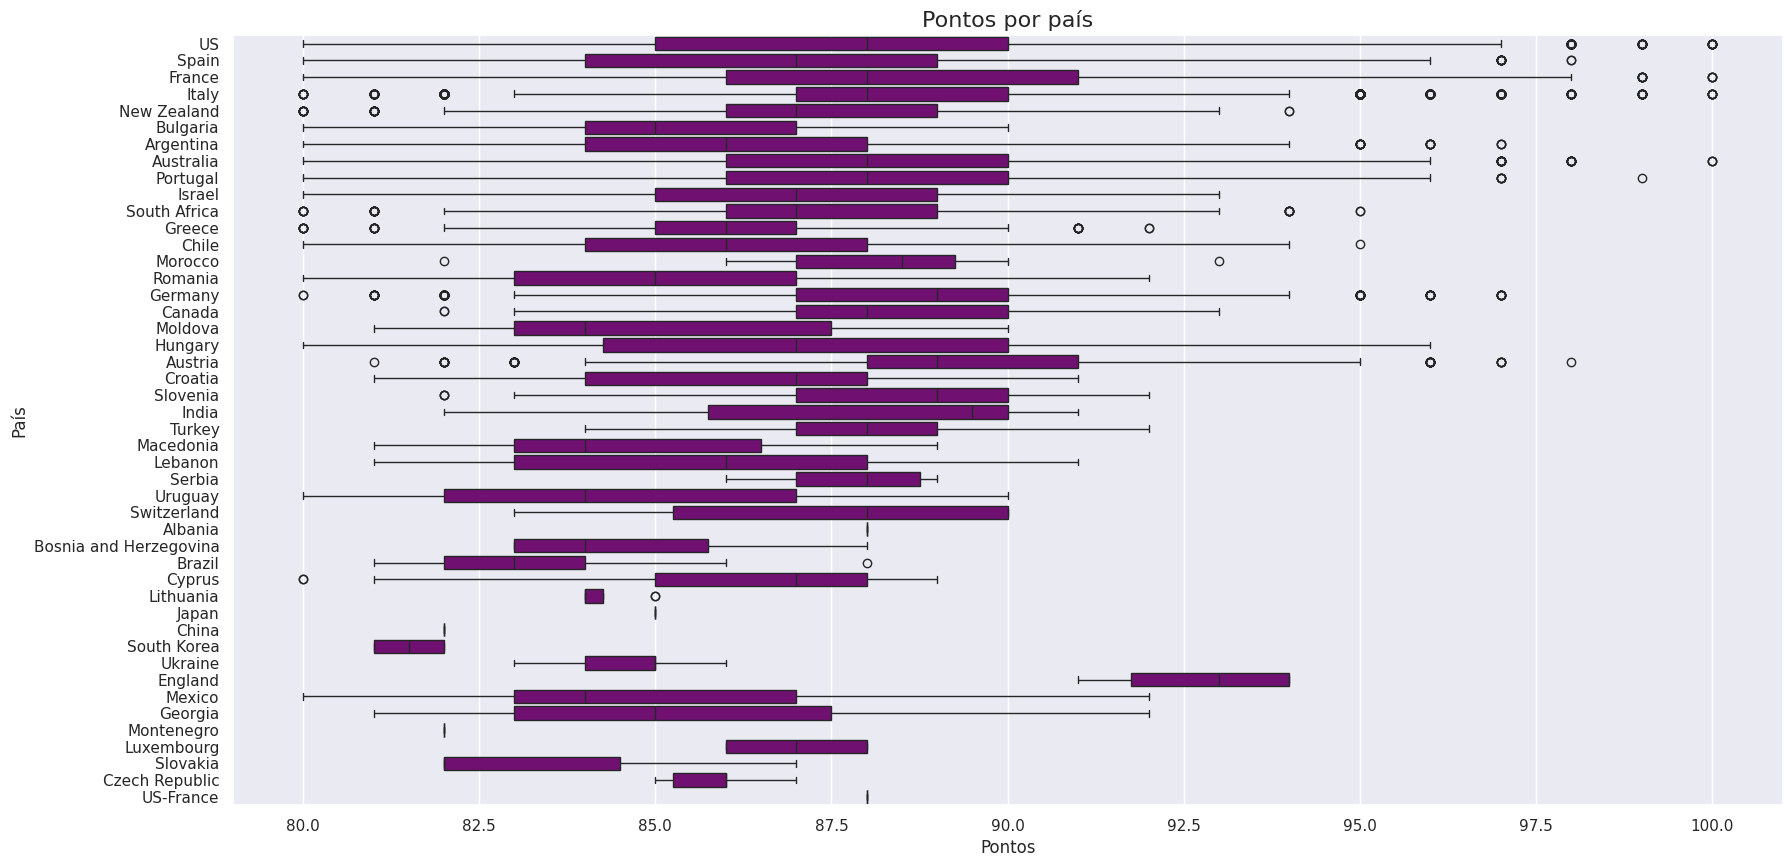

In [29]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df1, x='points', y='country', color='purple')
plt.title('Pontos por país', fontsize=16)
plt.xlabel("Pontos")
plt.ylabel("País")

Cria um gráfico de barras horizontal que mostra o preço médio das garrafas de vinho para cada país presente no DataFrame df1. Os países são listados no eixo y e os preços médios correspondentes no eixo x. Os países são ordenados de acordo com o preço médio, do mais alto para o mais baixo.

<ipython-input-30-52b72a198e3a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

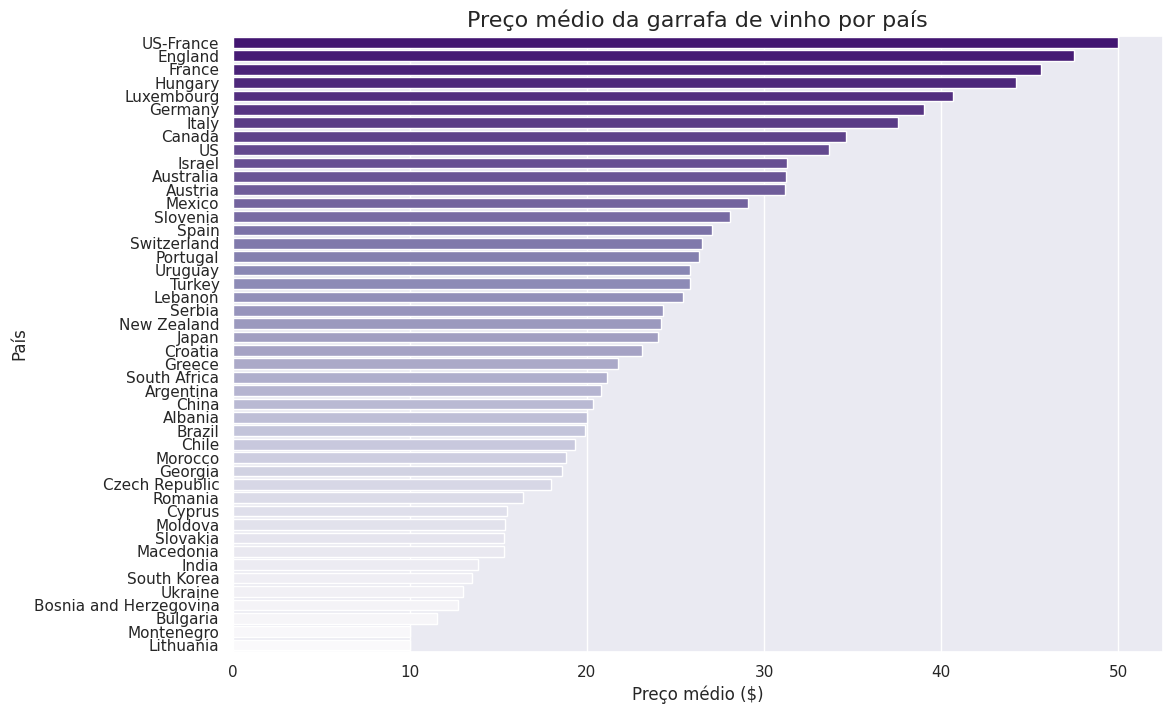

In [30]:
average_price = df1.groupby("country")["price"].mean()
average_price = average_price.sort_values(ascending=False)
y = average_price.index.to_series()
x = average_price.values

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço médio da garrafa de vinho por país', fontsize=16)
plt.xlabel('Preço médio ($)')
plt.ylabel('País')

Cria um histograma que mostra a distribuição dos preços dos vinhos. O gráfico está limitado para mostrar apenas vinhos com preços de até 200 dólares; O objetivo é visualizar como os preços dos vinhos se distribuem, com uma ênfase na quantidade de vinhos dentro de cada faixa de preço.

Text(0, 0.5, 'Frequência')

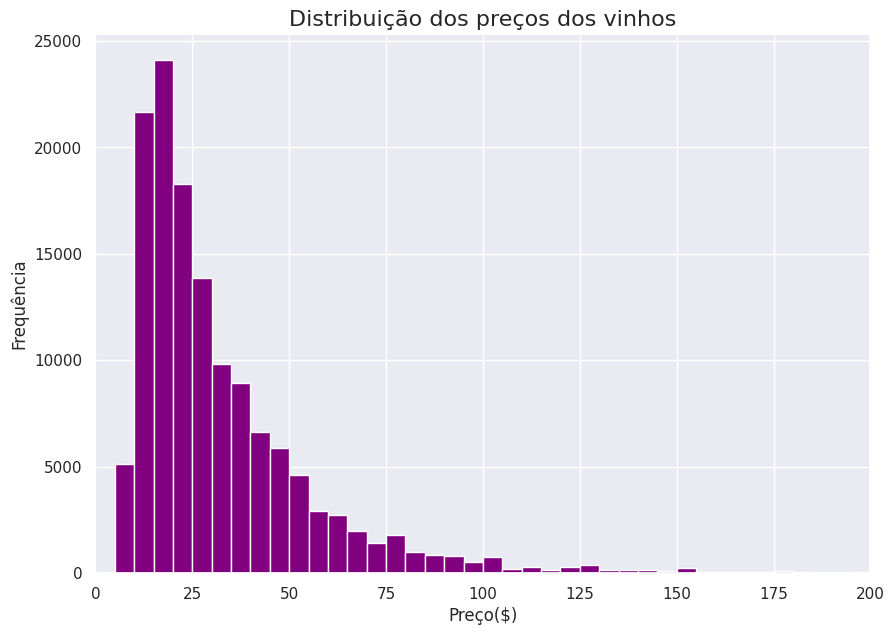

In [31]:
plt.figure(figsize=(10, 7))
bins = np.arange(0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color="purple")
plt.xlim(0, 200)
plt.title("Distribuição dos preços dos vinhos", fontsize=16)
plt.xlabel("Preço($)")
plt.ylabel("Frequência")

In [32]:
df1["price"].describe()

,price
count,137230.000000
mean,33.132019
std,36.323072
min,4.000000
25%,16.000000
50%,24.000000
75%,40.000000
max,2300.000000


In [33]:
np.log10(df1["price"]).describe()

,price
count,137230.000000
mean,1.408752
std,0.287772
min,0.602060
25%,1.204120
50%,1.380211
75%,1.602060
max,3.361728


Cria um histograma dos preços dos vinhos usando uma escala logarítmica para visualizar dados que variam exponencialmente, no caso, o preço de vinhos que pode ir de valores muito baixos a muito altos. O histograma mostra como os vinhos estão distribuídos em diferentes faixas de preço.

Text(0, 0.5, 'Frequência')

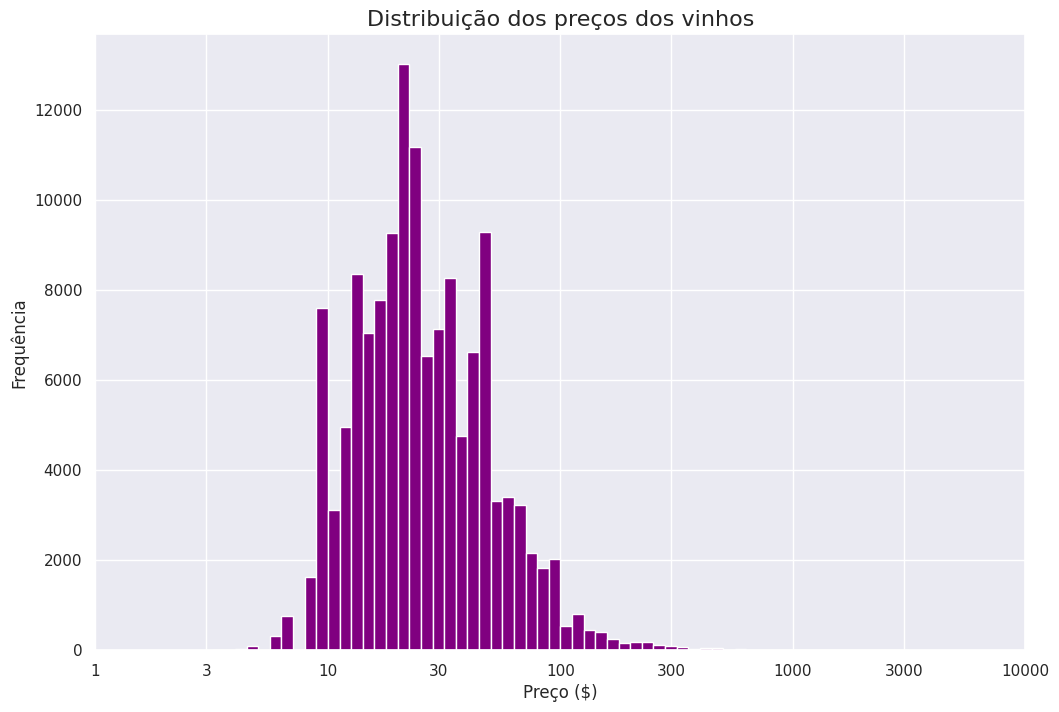

In [34]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color="purple")
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Cria um gráfico de dispersão (scatter plot) com uma linha de regressão que mostra a relação entre o preço e a pontuação dos vinhos. A escala logarítmica do eixo x ajuda a visualizar a grande variação nos preços dos vinhos. A linha de regressão tenta capturar a tendência geral de como a pontuação dos vinhos muda em relação ao preço.

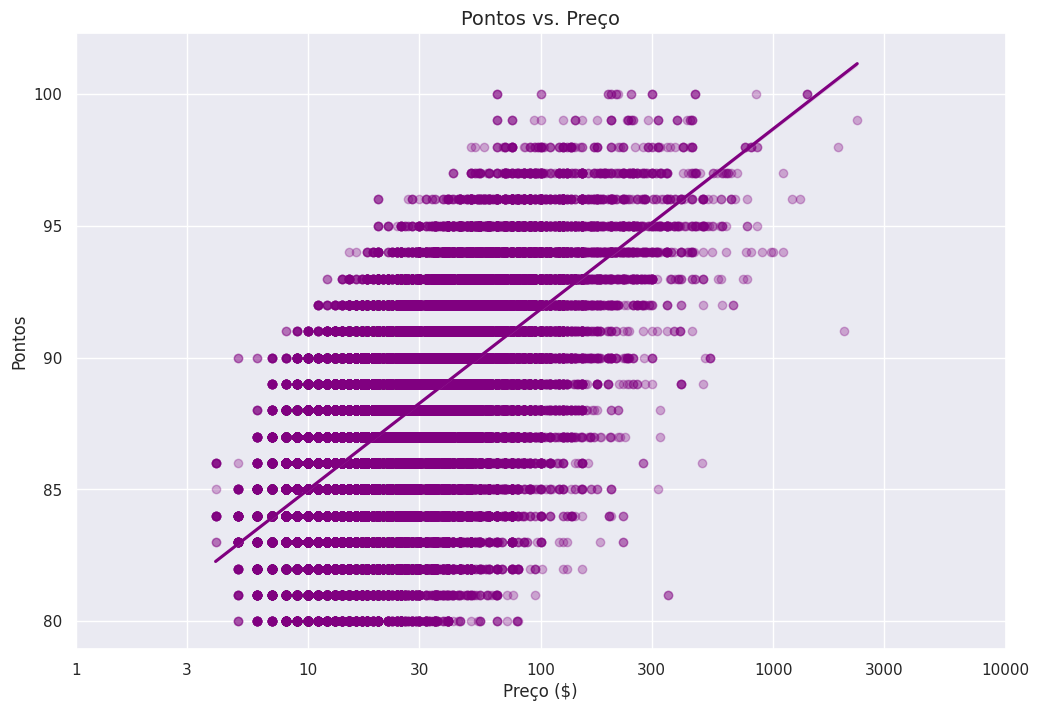

In [35]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.figure(figsize=(12, 8))
sns.regplot(x='price', y='points', data=df1, color="purple", logx=True, scatter_kws={'alpha': 0.3})
plt.title("Pontos vs. Preço", fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel("Preço ($)")
plt.ylabel("Pontos")
plt.show()

Filtra o conjunto de dados para encontrar o vinho com o menor preço.


In [36]:
df1[df1["price"] == df1['price'].min()][:1]

,country,description,points,price,province,variety,winery
1858,US,"Sweet and fruity, this canned wine feels soft ...",83,4.0,California,Chardonnay,Pam's Cuties


Filtra o conjunto de dados para encontrar o vinho com o maior preço.

In [37]:
df1[df1["price"] == df1['price'].max()][:1]

,country,description,points,price,province,variety,winery
34920,France,"A big, powerful wine that sums up the richness...",99,2300.0,Bordeaux,Bordeaux-style Red Blend,Château Latour


Conta as diferentes variedades de uva no conjunto de dados e retorna as 20 variedades mais comuns.

In [38]:
df1["variety"].value_counts()[:20]

,count
variety,
Chardonnay,13775
Pinot Noir,13625
Cabernet Sauvignon,12671
Red Blend,9377
Sauvignon Blanc,6054
Syrah,5667
Riesling,5212
Merlot,4987
Bordeaux-style Red Blend,4545


Gráfico boxplot que mostra a distribuição das pontuações dos vinhos para as 20 variedades de uva mais populares no DataFrame df1. Cada caixa representa a distribuição dos pontos para uma variedade específica, mostrando a mediana (linha dentro da caixa), os quartis (limites da caixa) e os valores atípicos.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Chardonnay'),
  Text(1, 0, 'Pinot Noir'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Sauvignon Blanc'),
  Text(5, 0, 'Syrah'),
  Text(6, 0, 'Riesling'),
  Text(7, 0, 'Merlot'),
  Text(8, 0, 'Bordeaux-style Red Blend'),
  Text(9, 0, 'Zinfandel'),
  Text(10, 0, 'Malbec'),
  Text(11, 0, 'Sangiovese'),
  Text(12, 0, 'White Blend'),
  Text(13, 0, 'Tempranillo'),
  Text(14, 0, 'Rosé'),
  Text(15, 0, 'Shiraz'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Portuguese Red'),
  Text(18, 0, 'Nebbiolo'),
  Text(19, 0, 'Rhône-style Red Blend')])

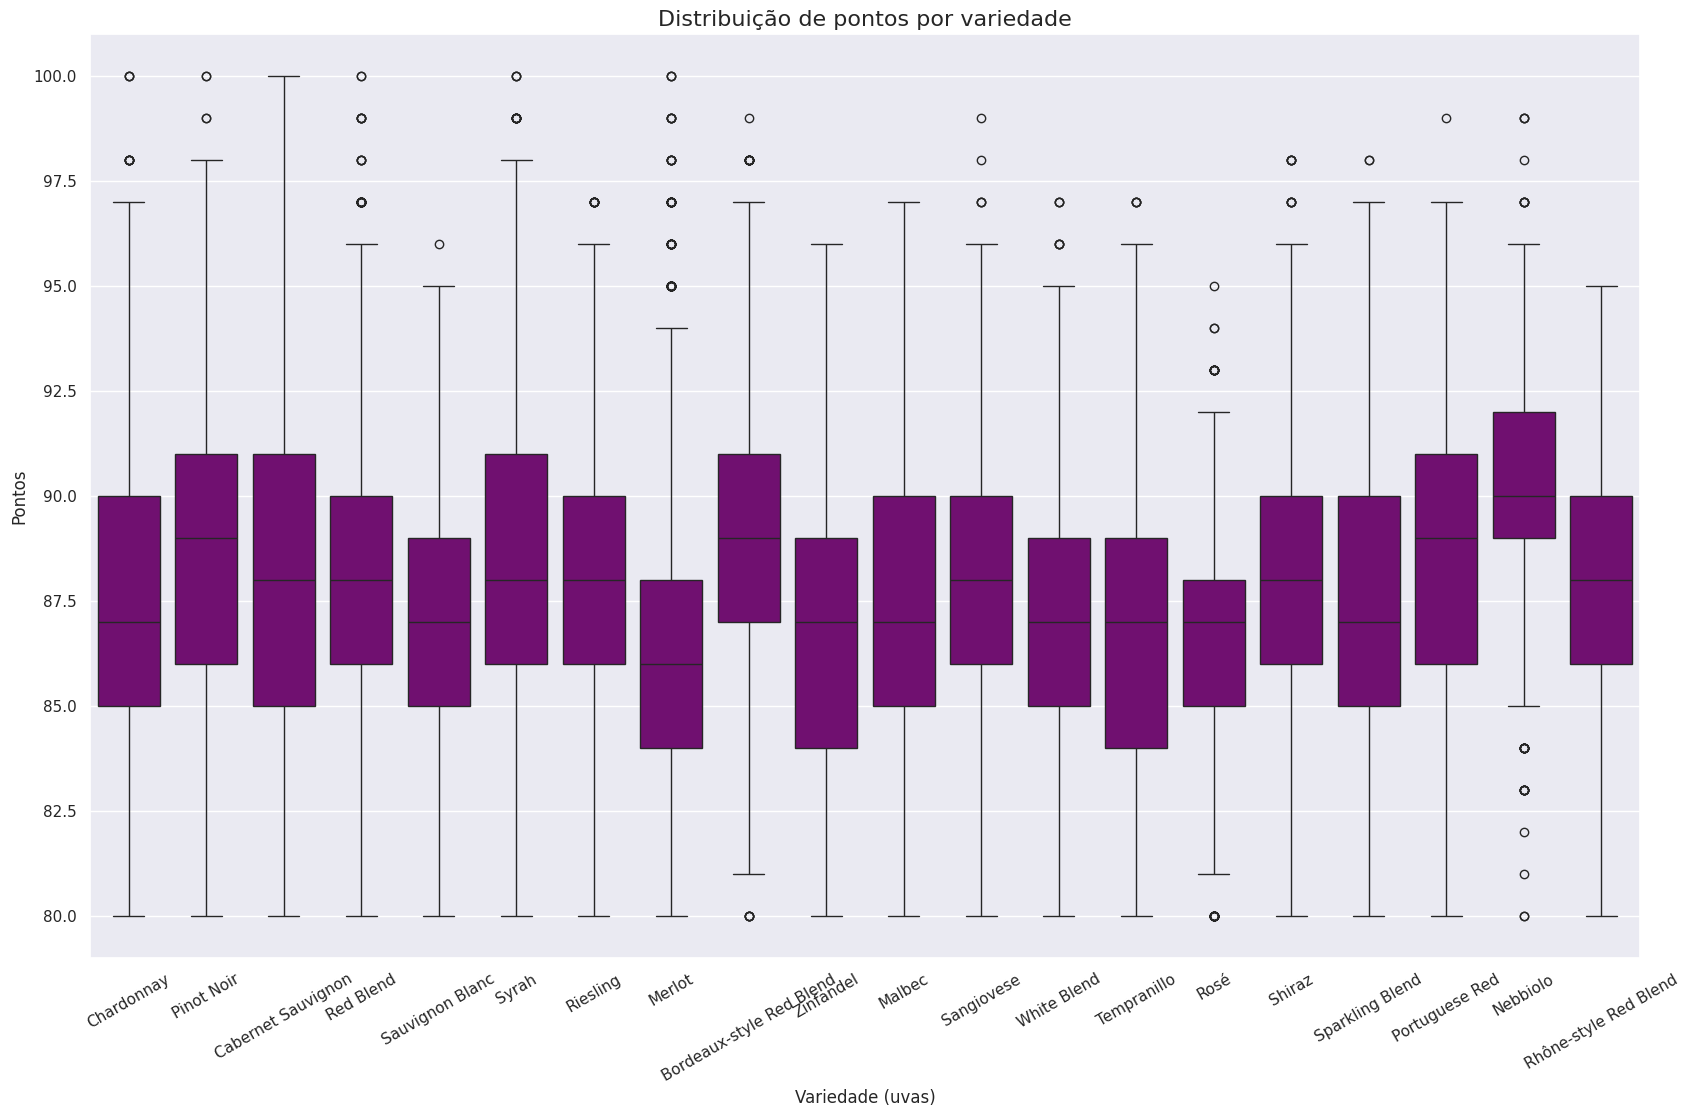

In [39]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color='purple',
            order=df1['variety'].value_counts().iloc[:20].index)
plt.title('Distribuição de pontos por variedade', fontsize=16)
plt.xlabel('Variedade (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=30)

Cria um DataFrame que contém os 10 vinhos com as melhores pontuações e com preço menor ou igual a 15 dólares, ordenados por pontuação.

In [40]:
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <= 15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,variety
140179,Spain,94,15.000000,Pedro Ximénez
84950,US,93,15.000000,Riesling
35303,France,93,15.000000,Tannat
120170,US,93,15.000000,Riesling
68126,South Africa,93,15.000000,Cabernet Sauvignon
19580,US,93,15.000000,Riesling
130847,US,93,14.000000,Viognier
23924,Portugal,93,15.000000,Portuguese Red
83618,US,93,15.000000,Pinot Gris
142923,US,93,12.000000,Johannisberg Riesling


Cria um DataFrame que contém os 10 vinhos com as melhores pontuações, com o preço entre 15 e 30 dólares. O DataFrame é ordenado por pontuação.

In [41]:
between_15_and_30 = df1.drop(["description", "province", "winery"], axis=1)
between_15_and_30 = between_15_and_30.query("price > 15 and price <= 30")
between_15_and_30 = between_15_and_30.sort_values(by="points", ascending=False)[:10]
between_15_and_30.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,variety
81970,US,96,30.000000,Chardonnay
65333,US,96,28.000000,Chardonnay
10541,Italy,96,27.000000,Red Blend
56971,US,96,20.000000,Syrah
116693,US,96,28.000000,Chardonnay
109231,US,96,20.000000,Syrah
134101,US,96,20.000000,Syrah
121313,US,96,28.000000,Chardonnay
134113,US,95,26.000000,Chardonnay
34205,France,95,25.000000,Petit Manseng


Cria um DataFrame que contém os 10 vinhos com as melhores pontuações, com o preço entre 30 e 50 dólares. O DataFrame é ordenado por pontuação.

In [42]:
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,variety
34924,US,98,50.000000,Bordeaux-style Red Blend
94921,US,97,42.000000,Chardonnay
70231,US,97,42.000000,Chardonnay
98494,US,97,50.000000,Pinot Noir
131161,US,97,42.000000,Chardonnay
127493,US,97,50.000000,Cabernet Sauvignon
42803,US,97,50.000000,Chardonnay
121504,US,97,50.000000,Pinot Noir
55504,US,97,50.000000,Pinot Noir
104200,US,97,50.000000,Chardonnay


Cria um DataFrame que contém os 10 vinhos com as melhores pontuações cujo preço é maior que 50 dólares. O DataFrame é ordenado por pontuação.

In [43]:
under_50 = df1.drop(["description", "province", "winery"], axis=1)
under_50 = under_50.query("price > 50")
under_50 = under_50.sort_values(by="points", ascending=False)[:10]
under_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,variety
84034,US,100,65.000000,Syrah
122767,US,100,100.000000,Pinot Noir
143522,US,100,245.000000,Cabernet Blend
78004,Italy,100,195.000000,Red Blend
51886,France,100,1400.000000,Chardonnay
111087,Italy,100,210.000000,Prugnolo Gentile
41521,Italy,100,460.000000,Merlot
137099,US,100,200.000000,Cabernet Sauvignon
83536,France,100,1400.000000,Chardonnay
19354,US,100,65.000000,Syrah


Filtrando as palavras que mais aparecem pela descrição.

(-0.5, 2047.5, 1023.5, -0.5)

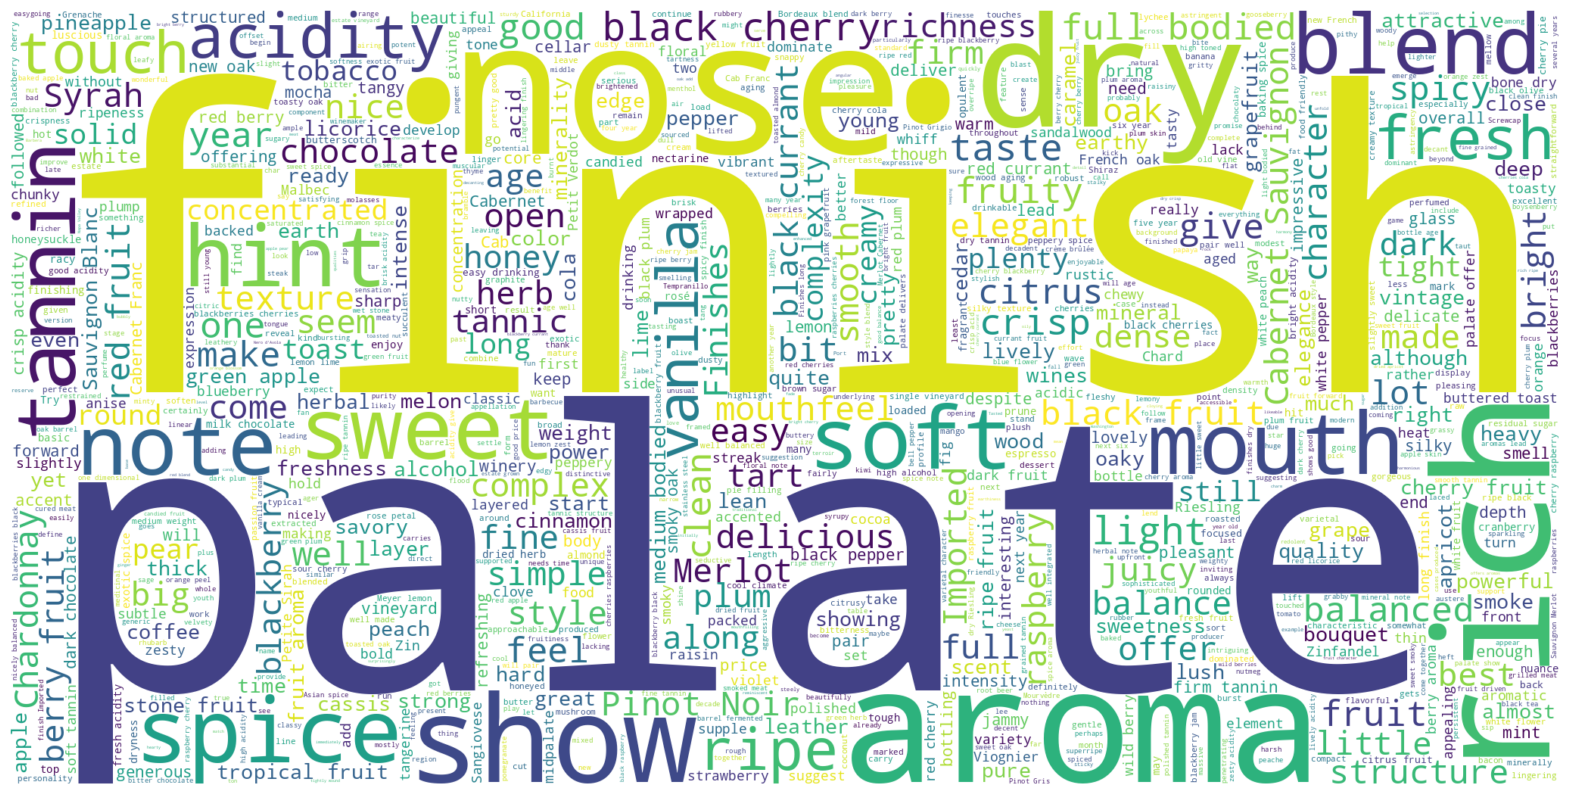

In [44]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df1["description"])

stopwords = set(STOPWORDS)
stopwords.update(("drink", "now", "wine", "flavor", "flavors"))

wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    width=2048,
    height=1024,
    max_words=1000
).generate(text)

plt.figure(figsize=(20, 18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


___


De onde vem o melhor vinho ?


O preço do vinho está relacionado com a qualidade ?


Certas variedades de uvas são de maior qualidade ?


Qual é o melhor vinho em cada faixa de preço ?


Que palavras são mais utilizadas para descrever um vinho ?